In [ ]:
!git clone https://github.com/OlaWod/my-tts-tools.git

In [ ]:
%cd my-tts-tools/

In [ ]:
#cd /content/drive/MyDrive/Colab\ Notebooks/audio-learning/my-tts-tools

/content/drive/MyDrive/Colab Notebooks/audio-learning/my-tts-tools


In [ ]:
import yaml
import torch
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

# test-data

In [ ]:
wav_file = './corpus/LJSpeech-1.1/wavs/LJ001-0001.wav'

In [ ]:
sr, wav = read(wav_file)

In [ ]:
print(sr)
print(wav)

22050
[-24 -25 -21 ...  24   7   2]


In [ ]:
max(abs(wav))

28342

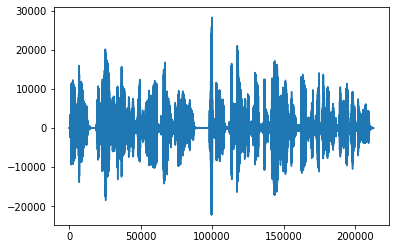

In [ ]:
plt.plot(wav)

# myaudio

In [ ]:
!pip install pyworld

     |████████████████████████████████| 225kB 5.6MB/s 
  Created wheel for pyworld: filename=pyworld-0.2.12-cp37-cp37m-linux_x86_64.whl size=609817 sha256=0f5824e9f4355510a038abd34b2bae79dcaefe16d1fe4bb8357d62b1585906cb
  Stored in directory: /root/.cache/pip/wheels/d0/e4/1c/a508000462b83164d5eba9a4b46f39b4b1645ac952bbe71551
Successfully built pyworld


In [ ]:
import myaudio

In [ ]:
config = yaml.load(open('./myaudio/config.yaml', 'r'))
config

{'audio': {'max_wav_value': 32768.0, 'sampling_rate': 22050},
 'mel': {'mel_fmax': 8000.0, 'mel_fmin': 0.0, 'n_mel_channels': 80},
 'stft': {'filter_length': 1024, 'hop_length': 256, 'win_length': 1024}}

## TacotronSTFT

In [ ]:
_stft = myaudio.TacotronSTFT(
    config["stft"]["filter_length"],
    config["stft"]["hop_length"],
    config["stft"]["win_length"],
    config["mel"]["n_mel_channels"],
    config["audio"]["sampling_rate"],
    config["mel"]["mel_fmin"],
    config["mel"]["mel_fmax"],
)

## get_mel_energy_from_wav(filename, stft, max_wav_value=32768.0)

In [ ]:
mel, energy = myaudio.get_mel_energy_from_wav(wav_file, _stft, config['audio']['max_wav_value'])

In [ ]:
print(mel.size())
print(energy.size())

torch.Size([80, 832])
torch.Size([832])


In [ ]:
mel

tensor([[-9.9454, -8.2868, -6.8776,  ..., -7.6741, -7.5906, -7.5509],
        [-8.3458, -7.8255, -6.3032,  ..., -7.7304, -7.7798, -7.0243],
        [-7.6163, -6.5003, -5.6330,  ..., -7.1627, -7.0222, -6.9754],
        ...,
        [-9.9448, -5.9017, -5.3131,  ..., -9.1962, -9.1589, -8.9164],
        [-9.9037, -4.8066, -4.0681,  ..., -9.0867, -8.9979, -9.0549],
        [-9.9471, -5.5974, -5.0066,  ..., -9.5082, -9.3816, -9.4361]])

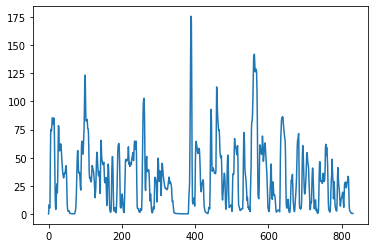

In [ ]:
plt.plot(energy)

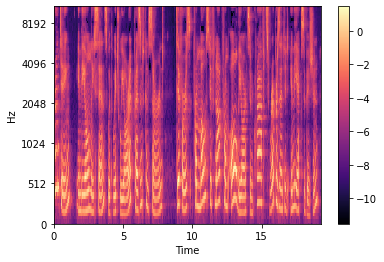

In [ ]:
librosa.display.specshow(mel.numpy().astype(np.float32), sr=config['audio']['sampling_rate'], x_axis='time', y_axis='mel')
plt.colorbar()

## get_f0_from_wav(filename, hop_length=256, max_wav_value=32768.0)

In [ ]:
f0 = myaudio.get_f0_from_wav(wav_file, config['stft']['hop_length'], config['audio']['max_wav_value'])

In [ ]:
f0.shape

(832,)

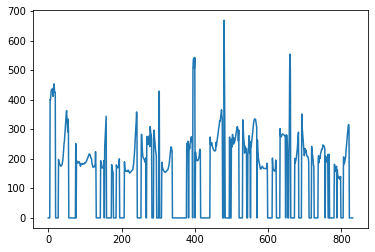

In [ ]:
plt.plot(f0)

## save_feature_to_npy(feature, feature_type, out_dir='./', basename='xx')

In [ ]:
myaudio.save_feature_to_npy(mel, 'mel', out_dir='./', basename='xx1957')

In [ ]:
myaudio.save_feature_to_npy(energy, 'energy', out_dir='./', basename='xx1957')

In [ ]:
myaudio.save_feature_to_npy(f0, 'f0', out_dir='./', basename='xx1957')

## get_feature_from_npy(filename)

In [ ]:
mel_ = myaudio.get_feature_from_npy('mel-xx1957.npy')

In [ ]:
energy_ = myaudio.get_feature_from_npy('energy-xx1957.npy')

In [ ]:
f0_ = myaudio.get_feature_from_npy('f0-xx1957.npy')

In [ ]:
print(mel_.size())
print(energy_.size())
print(f0_.size())

torch.Size([80, 832])
torch.Size([832])
torch.Size([832])


In [ ]:
print(mel_)

tensor([[-9.9454, -8.2868, -6.8776,  ..., -7.6741, -7.5906, -7.5509],
        [-8.3458, -7.8255, -6.3032,  ..., -7.7304, -7.7798, -7.0243],
        [-7.6163, -6.5003, -5.6330,  ..., -7.1627, -7.0222, -6.9754],
        ...,
        [-9.9448, -5.9017, -5.3131,  ..., -9.1962, -9.1589, -8.9164],
        [-9.9037, -4.8066, -4.0681,  ..., -9.0867, -8.9979, -9.0549],
        [-9.9471, -5.5974, -5.0066,  ..., -9.5082, -9.3816, -9.4361]])


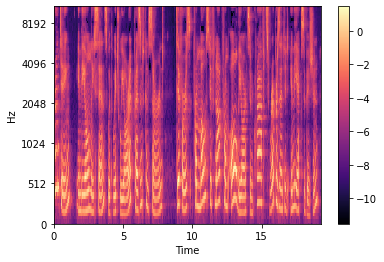

In [ ]:
librosa.display.specshow(mel_.numpy().astype(np.float32), sr=config['audio']['sampling_rate'], x_axis='time', y_axis='mel')
plt.colorbar()

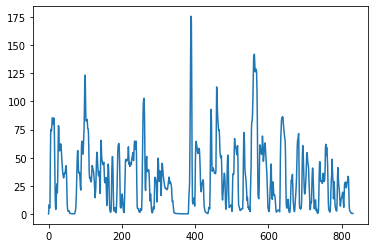

In [ ]:
plt.plot(energy_)

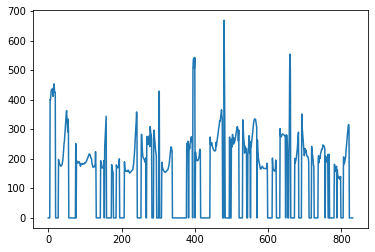

In [ ]:
plt.plot(f0_)

# myvocoder

In [ ]:
from myvocoder import get_vocoder, vocoder_infer

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## get_vocoder
get_vocoder(name, device)

In [ ]:
vocoder1 = get_vocoder("MelGAN", device)

Downloading: "https://github.com/descriptinc/melgan-neurips/archive/master.zip" to /root/.cache/torch/hub/master.zip


In [ ]:
vocoder2 = get_vocoder("MelGAN-LJ", device)

Using cache found in /root/.cache/torch/hub/descriptinc_melgan-neurips_master


In [ ]:
vocoder3 = get_vocoder("HiFi-GAN", device)

Removing weight norm...


In [ ]:
vocoder4 = get_vocoder("HiFi-GAN-LJ", device)

Removing weight norm...


In [ ]:
vocoder5 = get_vocoder("WaveGlow", device)

Downloading: "https://github.com/nvidia/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip


## vocoder_infer
vocoder_infer(vocoder, mels, vocoder_name, max_wav_value=32768.0)

In [ ]:
mels = mel.unsqueeze(0).to(device)
mels

tensor([[[-9.9454, -8.2868, -6.8776,  ..., -7.6741, -7.5906, -7.5509],
         [-8.3458, -7.8255, -6.3032,  ..., -7.7304, -7.7798, -7.0243],
         [-7.6163, -6.5003, -5.6330,  ..., -7.1627, -7.0222, -6.9754],
         ...,
         [-9.9448, -5.9017, -5.3131,  ..., -9.1962, -9.1589, -8.9164],
         [-9.9037, -4.8066, -4.0681,  ..., -9.0867, -8.9979, -9.0549],
         [-9.9471, -5.5974, -5.0066,  ..., -9.5082, -9.3816, -9.4361]]],
       device='cuda:0')

In [ ]:
wavs1 = vocoder_infer(vocoder1, mels, "MelGAN")

In [ ]:
wavs2 = vocoder_infer(vocoder2, mels, "MelGAN-LJ")

In [ ]:
wavs3 = vocoder_infer(vocoder3, mels, "HiFi-GAN")

In [ ]:
wavs4 = vocoder_infer(vocoder4, mels, "HiFi-GAN-LJ")

In [ ]:
wavs5 = vocoder_infer(vocoder5, mels, "WaveGlow")

In [ ]:
print(wavs1)
print(wavs2)
print(wavs3)
print(wavs4)
print(wavs5)

[[-1 -3 -3 ... -8 -8 -8]]
[[  8  12  15 ... -24  -6   3]]
[[-5 -1 -3 ... 24  0  3]]
[[ -4 -11 -10 ...  27  33  24]]
[[-8 -9 -5 ... 11 16  2]]


In [ ]:
print(wavs1.shape)
print(wavs2.shape)
print(wavs3.shape)
print(wavs4.shape)
print(wavs5.shape)

(1, 212992)
(1, 212992)
(1, 212992)
(1, 212992)
(1, 212992)


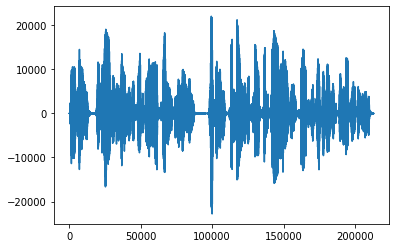

In [ ]:
plt.plot(wavs1[0])

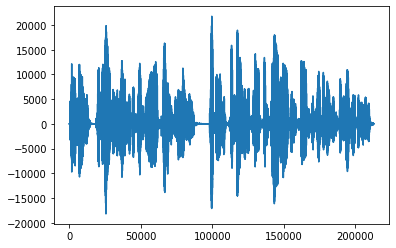

In [ ]:
plt.plot(wavs2[0])

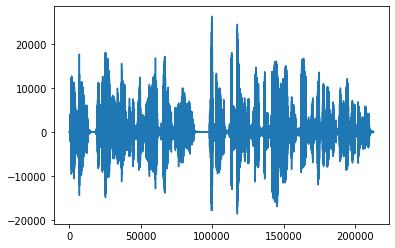

In [ ]:
plt.plot(wavs3[0])

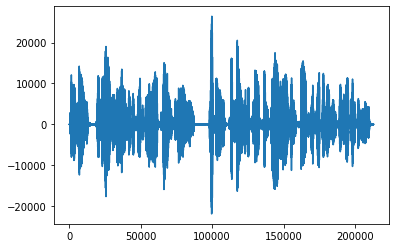

In [ ]:
plt.plot(wavs4[0])

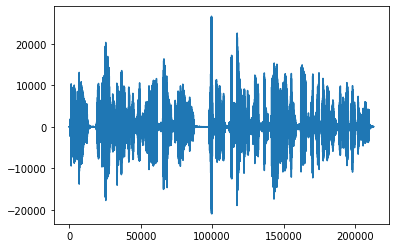

In [ ]:
plt.plot(wavs5[0])

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(wavs1[0], rate=22050)

In [ ]:
Audio(wavs2[0], rate=22050)

In [ ]:
Audio(wavs3[0], rate=22050)

In [ ]:
Audio(wavs4[0], rate=22050)

In [ ]:
Audio(wavs5[0], rate=22050)

# mytext

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 5.9MB/s 


In [ ]:
!pip install g2p_en

     |████████████████████████████████| 3.1MB 5.8MB/s 
     |████████████████████████████████| 184kB 38.9MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp37-none-any.whl size=16261 sha256=e538aa86ffeb52acf31569d8f606a4086e2761f56039e543ed5e7a53cb684c9e
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [ ]:
!pip install pypinyin

     |████████████████████████████████| 1.3MB 4.4MB/s 


In [ ]:
!pip install tgt

  Created wheel for tgt: filename=tgt-1.4.4-cp37-none-any.whl size=28930 sha256=ec432f85a3d83db64013b5a8203a3cf48691af1b76c9eeb23e469f660f4ec54e
  Stored in directory: /root/.cache/pip/wheels/d0/01/c2/7b18446d6ce6b1ced14c50044844180f89a51b960d0799802d
Successfully built tgt


In [ ]:
from mytext import symbols, phone_to_sequence, process_english, process_mandarin, process_textgrid

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [ ]:
len(symbols)

360

In [ ]:
symbols

['_',
 '-',
 '!',
 "'",
 '(',
 ')',
 ',',
 '.',
 ':',
 ';',
 '?',
 ' ',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '@AA',
 '@AA0',
 '@AA1',
 '@AA2',
 '@AE',
 '@AE0',
 '@AE1',
 '@AE2',
 '@AH',
 '@AH0',
 '@AH1',
 '@AH2',
 '@AO',
 '@AO0',
 '@AO1',
 '@AO2',
 '@AW',
 '@AW0',
 '@AW1',
 '@AW2',
 '@AY',
 '@AY0',
 '@AY1',
 '@AY2',
 '@B',
 '@CH',
 '@D',
 '@DH',
 '@EH',
 '@EH0',
 '@EH1',
 '@EH2',
 '@ER',
 '@ER0',
 '@ER1',
 '@ER2',
 '@EY',
 '@EY0',
 '@EY1',
 '@EY2',
 '@F',
 '@G',
 '@HH',
 '@IH',
 '@IH0',
 '@IH1',
 '@IH2',
 '@IY',
 '@IY0',
 '@IY1',
 '@IY2',
 '@JH',
 '@K',
 '@L',
 '@M',
 '@N',
 '@NG',
 '@OW',
 '@OW0',
 '@OW1',
 '@OW2',
 '@OY',
 '@OY0',
 '@OY1',
 '@OY2',
 '@P',
 '@R',
 '@S',
 '@SH',
 '@T',
 '@TH',
 '@UH',
 '@UH0',
 '@U

In [ ]:
phone1, idphone1 = process_english("hello world")
phone2, idphone2 = process_mandarin("要和可莉一起去炸鱼吗")

Raw Text Sequence: hello world
Phoneme Sequence: {HH AH0 L OW1 W ER1 L D}
[106  73 117 123 144  98 117  90]
Raw Text Sequence: 要和可莉一起去炸鱼吗
Phoneme Sequence: {y iao4 h e2 k e3 l i4 y i4 q i3 q v4 zh a2 y v2 m a5}
[168 244 154 197 156 198 157 224 168 224 161 223 161 339 170 172 168 337
 158 175]


In [ ]:
idphoneme = phone_to_sequence(phone1, ["english_cleaners"])
idphoneme

[106, 73, 117, 123, 144, 98, 117, 90]

In [ ]:
idphoneme = phone_to_sequence(phone2, [])
idphoneme

[168,
 244,
 154,
 197,
 156,
 198,
 157,
 224,
 168,
 224,
 161,
 223,
 161,
 339,
 170,
 172,
 168,
 337,
 158,
 175]

In [ ]:
phone, duration = process_textgrid('./preprocessed_data/LJSpeech/textgrid/LJ001-0001.TextGrid')

In [ ]:
print(phone)
print(duration)

{P R IH1 N T IH0 NG sp IH1 N DH IY0 OW1 N L IY0 S EH1 N S W IH1 DH sp W IH1 CH W IY1 AA1 R AE1 T P R EH1 Z AH0 N T K AH0 N S ER1 N D sp D IH1 F ER0 Z sp F R AH1 M M OW1 S T IH1 F N AA1 T F R AH1 M AO1 L DH IY0 AA1 R T S AH0 N D K R AE1 F T S R EH2 P R IH0 Z EH1 N T IH0 D IH1 N DH IY0 EH2 K S AH0 B IH1 SH AH0 N}
[0.04, 0.030000000000000006, 0.12, 0.03, 0.060000000000000026, 0.15999999999999998, 0.24000000000000005, 0.12, 0.1399999999999999, 0.06000000000000005, 0.040000000000000036, 0.11999999999999988, 0.10000000000000009, 0.09000000000000008, 0.039999999999999813, 0.10000000000000009, 0.16999999999999993, 0.1100000000000001, 0.09000000000000008, 0.09999999999999987, 0.04999999999999982, 0.040000000000000036, 0.06000000000000005, 0.03000000000000025, 0.06000000000000005, 0.08999999999999986, 0.10000000000000009, 0.06000000000000005, 0.10999999999999988, 0.10999999999999988, 0.08000000000000007, 0.04999999999999982, 0.11000000000000032, 0.040000000000000036, 0.040000000000000036, 0.0699

In [ ]:
phone_to_sequence(phone, ["english_cleaners"])

[129,
 130,
 109,
 119,
 133,
 108,
 120,
 357,
 109,
 119,
 91,
 112,
 123,
 119,
 117,
 112,
 131,
 94,
 119,
 131,
 144,
 109,
 91,
 357,
 144,
 109,
 89,
 144,
 113,
 66,
 130,
 70,
 133,
 129,
 130,
 94,
 146,
 73,
 119,
 133,
 116,
 73,
 119,
 131,
 98,
 119,
 90,
 357,
 90,
 109,
 104,
 97,
 146,
 357,
 104,
 130,
 74,
 118,
 118,
 123,
 131,
 133,
 109,
 104,
 119,
 66,
 133,
 104,
 130,
 74,
 118,
 78,
 117,
 91,
 112,
 66,
 130,
 133,
 131,
 73,
 119,
 90,
 116,
 130,
 70,
 104,
 133,
 131,
 130,
 95,
 129,
 130,
 108,
 146,
 94,
 119,
 133,
 108,
 90,
 109,
 119,
 91,
 112,
 95,
 116,
 131,
 73,
 88,
 109,
 132,
 73,
 119]

# prepare_data

In [ ]:
!pip install PyYAML==5.4.1

     |████████████████████████████████| 645kB 5.8MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!python prepare_data.py config/LJSpeech/preprocess.yaml

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
Start processing...
100% 5/5 [00:01<00:00,  4.02it/s]


In [ ]:
!python prepare_data.py config/AISHELL3/preprocess.yaml

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
Processing training set...
100% 15/15 [00:11<00:00,  1.29it/s]
Processing testing set...
100% 5/5 [00:02<00:00,  1.97it/s]


In [ ]:
!./mfa/montreal-forced-aligner/bin/mfa_align ./preprocessed_data/LJSpeech/data ./mytext/lexicon/librispeech-lexicon.txt english ./preprocessed_data/LJSpeech/textgrid

/bin/bash: ./mfa/montreal-forced-aligner/bin/mfa_align: Permission denied


In [ ]:
!./mfa/montreal-forced-aligner/bin/mfa_train_and_align ./preprocessed_data/AISHELL3/data ./mytext/lexicon/pinyin-lexicon-r.txt ./preprocessed_data/AISHELL3/textgrid

# preprocess

In [ ]:
!python preprocess.py config/LJSpeech/preprocess.yaml

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
Loading STFT...
Start processing...
LJ


In [ ]:
!python preprocess.py config/AISHELL3/preprocess.yaml

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
Loading STFT...
Start processing...
SSB0005
SSB0009
SSB0011


# Under construction...